In [1]:
from sklearn import datasets
import numpy.linalg as lin
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist, fashion_mnist
from keras import models
from keras.utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

Using TensorFlow backend.


# MNIST 기초
- inverse를 통한 mnist 학습
- 신경망을 통한 mnist 학습
- CNN통한 minit 학습
- fashion mnist, face db 테스트
- web 연동(한글, 스케치인식)

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)
(10000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254
  109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252
   82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   

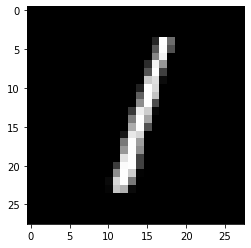

In [3]:
print(X_train.shape)
plt.imshow(X_train[2], cmap='gray')
print(X_test.shape)
plt.imshow(X_test[2], cmap='gray')
print(X_test[2])
print(y_train.shape)
print(y_train)

In [3]:
X_train = X_train.reshape((X_train.shape[0], 784))
X_test = X_test.reshape((X_test.shape[0], 784))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [4]:
y_train_e = to_categorical(y_train)
y_test_e = to_categorical(y_test)

## 1. 역행렬을 이용한 학습

- y = W * [x 1]     y=wx    y=wx+b
- A 60000x785(=784+1)
- W = inv(A)*Y     , where Y = 60000x10,   W = 785x10
- predict  [x 1] * W  , where x = 1x784    W = 785x10 ,  predict=1x10  

In [31]:
A = np.hstack((X_train, np.ones((60000,1)) ))
print(A.shape)

(60000, 785)


In [32]:
%%time
W = np.matmul(lin.pinv(A), y_train_e)
print(W.shape)
print(W)

(785, 10)
[[ 7.44778176e-17  3.08116485e-17  6.24517735e-17 ... -1.88247215e-17
  -9.68761667e-17  2.74183832e-17]
 [ 2.72617137e-15  6.00860904e-15  5.60436230e-15 ... -3.27464737e-15
  -7.94429899e-15  1.43796527e-15]
 [ 3.84484283e-16  2.05591053e-15  4.34029518e-16 ... -5.97620728e-16
  -7.11142655e-16  5.59708728e-16]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.57799659e-01  2.41326501e-01  4.98284745e-02 ...  1.41540555e-01
  -1.23002061e-01  4.55121243e-02]]
Wall time: 4.95 s


In [9]:
print(W[:,0].shape)

(785,)


(10000, 10)
(10000,)
[7 2 1 ... 4 5 6]
0.8603


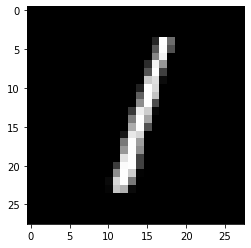

In [33]:
T = np.hstack((X_test, np.ones((10000,1)) ))
p = np.matmul(T, W)
print(p.shape)
p  = np.argmax(p, axis=1)
print(p.shape)
print(p)
plt.imshow(X_test[2,:].reshape(28,28), cmap='gray')

print(np.mean(p == y_test) )


In [18]:
a = np.array([[1,2,3],    
              [7,8,9],
              [4,10,6]])
np.argmax(a, axis=1)

array([1, 2, 1], dtype=int64)

In [36]:
model = Sequential()
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#0.1   0.9    0.5       
#0.1/(0.1+0.9+1.2)
#exp(0.1)/(  exp(0.1)+  exp(0.9)+  exp(1.2))

In [ ]:
hist = model.fit(x = X_train, y = y_train_e,
                epochs = 10,
                verbose = 1,
                 batch_size=100)

In [38]:
score = model.evaluate(X_test, y_test_e, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 4.116631657415203
Test accuracy: 0.8673999905586243


In [92]:
p = model.predict(X_test)
print(p.shape)
p  = np.argmax(p, axis=1)
print(p.shape)
print(p)
print(np.mean(p == y_test) )

(10000, 10)
(10000,)
[7 2 1 ... 4 5 6]
0.8674


In [7]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 784 차원 + 1   : 분류가당 785개* 10 분류기 = 7850 
print(784 *  10 + 10)    ,    input size * 뉴런수 + 뉴런수

7850


In [26]:
model = Sequential()
model.add(Dense(256, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_20 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [17]:
# layer1 = 784* 5 + 5 
print(784* 5 + 5)
# layer2 = 5*  10 + 10
print(5*  10 + 10)

3925
60


In [ ]:
hist = model.fit(x = X_train, y = y_train_e,
                epochs = 100,
                verbose = 1,
                 batch_size=100)

In [24]:
score = model.evaluate(X_test, y_test_e, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9666000008583069


In [25]:
model = Sequential()
model.add(Dense(256, input_dim=784, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [27]:
hist = model.fit(x = X_train, y = y_train_e,
                epochs = 50,
                verbose = 1,
                 batch_size=100)
score = model.evaluate(X_test, y_test_e, verbose=0)
print('Test accuracy:', score[1])

Epoch 1/50
60000/60000 [==============================] - 2s 27us/step - loss: 4.0676 - accuracy: 0.8992
Epoch 2/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.6012 - accuracy: 0.9445
Epoch 3/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.3014 - accuracy: 0.9569
Epoch 4/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.2034 - accuracy: 0.9642
Epoch 5/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.1696 - accuracy: 0.9675
Epoch 6/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.1669 - accuracy: 0.9688
Epoch 7/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.1531 - accuracy: 0.9690
Epoch 8/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.1355 - accuracy: 0.9711
Epoch 9/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.1327 - accuracy: 0.9710
Epoch 10/50
60000/60000 [==============================

## 정규화

In [30]:
X_train = X_train / 255
X_test = X_test / 255

In [31]:
hist = model.fit(x = X_train, y = y_train_e,
                epochs = 50,
                verbose = 1,
                 batch_size=100)
score = model.evaluate(X_test, y_test_e, verbose=0)
print('Test accuracy:', score[1])

Epoch 1/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.2972 - accuracy: 0.9147
Epoch 2/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0988 - accuracy: 0.9719
Epoch 3/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0710 - accuracy: 0.9797
Epoch 4/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0547 - accuracy: 0.9849
Epoch 5/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0438 - accuracy: 0.9881
Epoch 6/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0359 - accuracy: 0.9907
Epoch 7/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0291 - accuracy: 0.9927
Epoch 8/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0242 - accuracy: 0.9941
Epoch 9/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.0193 - accuracy: 0.9955
Epoch 10/50
60000/60000 [==============================

## CNN